# Pymaceuticals Inc.
---

### Analysis

- Both drugs, Capomulin and Ramicane, are shown as better effective treatments compared to Ceftamine and Infubinol (Refer 'Final Tumor Volume by Drug' as box plot).

- Capomulin and Ramicane have a negative skew distribution and the average tumor volume undoubltly falls to the left of the median.  In contrast,  Infubinol and Ceftamin have a positive skew with means falling to the right of the median.  Both Capomulin and Ramicane have outliers (2 or less).  The outliers have some effect on the plots distribution, but becuase the number of outlier occurence is low, the data is still reliable.

- There is a high positive correlation (r= 0.84) between a mouse's weight and the volume of the tumor.  The heavier the mouse, the less effective the Capomulin treatment is at managing the volume of the tumor. 
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

pyma_final = pd.merge(study_results, mouse_metadata, how= "left", on= ["Mouse ID", "Mouse ID"])


# Display the data table for preview
pyma_final.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice.

mice_count = len(pyma_final["Mouse ID"].unique())

mice_count


249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = pyma_final[pyma_final.duplicated(["Mouse ID", "Timepoint"])]


In [8]:
# Optional: Get all the data for the duplicate mouse ID.

pyma_final.loc[pyma_final["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_pyma_final = pyma_final[pyma_final["Mouse ID"] != 'g989']
clean_mouse_meta = mouse_metadata[mouse_metadata["Mouse ID"] != 'g989']

clean_pyma_df = pd.DataFrame(clean_pyma_final)

clean_pyma_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [18]:
# Checking the number of mice in the clean DataFrame.

clean_mouse_count = len(clean_mouse_meta)

clean_mouse_count


248

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volumefor each regimen

pyma_stats_mean = clean_pyma_df["Tumor Volume (mm3)"].mean()
pyma_stats_median = clean_pyma_df["Tumor Volume (mm3)"].median()
pyma_stats_var = clean_pyma_df["Tumor Volume (mm3)"].var()
pyma_stats_std = clean_pyma_df["Tumor Volume (mm3)"].std()
pyma_stats_sem = st.sem(clean_pyma_df["Tumor Volume (mm3)"])

pyma_stats = {"Mean": pyma_stats_mean, "Median": pyma_stats_median, "Variance": pyma_stats_var, "St. Dev": pyma_stats_std, "St. Err.": pyma_stats_sem}

pyma_stats


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
pyma_stats_df_mean = clean_pyma_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
pyma_stats_df_median = clean_pyma_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
pyma_stats_df_var = clean_pyma_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
pyma_stats_df_std = clean_pyma_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
pyma_stats_df_sem = clean_pyma_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

pyma_stats_df = pd.DataFrame({"Mean Tumor Volume": pyma_stats_df_mean, "Median Tumor Volume": pyma_stats_df_median, "Tumor Volume Variance": pyma_stats_df_var,
                  "Tumor Volume Std. Dev.": pyma_stats_df_std, "Tumor Volume Std. Err.": pyma_stats_df_sem})
pyma_stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
clean_pyma_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

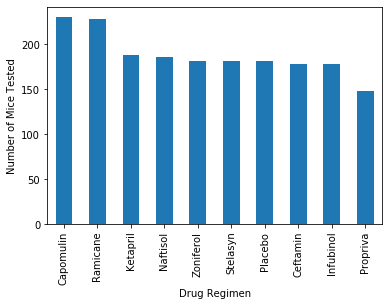

In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pyma_bar = clean_pyma_df['Drug Regimen'].value_counts().plot.bar()

pyma_bar.set_xlabel("Drug Regimen")
pyma_bar.set_ylabel("Number of Mice Tested")

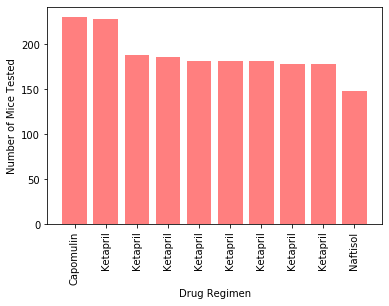

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#Value to plot on y-axis
count_per_drug = clean_pyma_df['Drug Regimen'].value_counts()

#Value to plot on x-axis
num_of_drugs = np.arange(len(count_per_drug))

#Using pyplot to show a bar graph
plt.bar(num_of_drugs, count_per_drug, color = 'r', alpha= 0.5, align = 'center')

#Assigning tick locations
tick_locations = [value for value in num_of_drugs]
plt.xticks(tick_locations, clean_pyma_df['Drug Regimen'], rotation='vertical')

#Labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()

Text(0, 0.5, '')

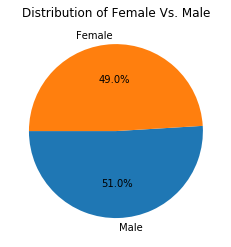

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Identify percentage of male versus female
pyma_pie = clean_pyma_df['Sex'].value_counts()

#Pie chart with formating
pyma_pie_final = pyma_pie.plot.pie(autopct="%1.1f%%", startangle=180, title='Distribution of Female Vs. Male')

# Hide the 'y' label
pyma_pie_final.set_ylabel('')


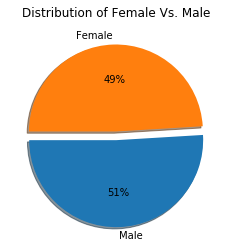

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

explode = (0.1,0)

# Identify distribution of data by sex
pyma_pie_pyplt = clean_pyma_df['Sex'].value_counts()

# Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(pyma_pie_pyplt, labels=['Male', 'Female'], autopct="%1.0f%%", explode=explode, shadow=True, startangle=180)
plt.title('Distribution of Female Vs. Male')

# Display plot
plt.show()


## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_timepoint_df = pd.DataFrame(clean_pyma_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Last_tp'})
                        

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_mtdf = pd.merge(clean_pyma_df,greatest_timepoint_df, how= "left", on= ["Mouse ID", "Mouse ID"])

merged_mtdf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last_tp
0,b128,0,45.0,0,Capomulin,Female,9,22,45
1,f932,0,45.0,0,Ketapril,Male,15,29,0
2,g107,0,45.0,0,Ketapril,Female,2,29,35
3,a457,0,45.0,0,Ketapril,Female,11,30,10
4,c819,0,45.0,0,Ketapril,Male,21,25,40


In [29]:


treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
    
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
# Put treatments into a list for for loop (and later for plot labels)     
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug
    treatment_data = merged_mtdf.loc[merged_mtdf['Drug Regimen'] == drug]
    
    #Get the tumor volumes
    tumor_volume_data = treatment_data['Tumor Volume (mm3)']
    tumor_vol_list.append(tumor_volume_data)
    
    #Calculate quartiles and IQR
    quartiles = tumor_volume_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    upper_bound = upperq + (1.5*iqr)
    lower_bound = lowerq - (1.5*iqr)
    
    #Display upper & lower bounds + IQR
    print(f'Upper Bound for {drug}: {upper_bound}')
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'IQR for {drug}: {iqr}')
    
    #Locate tumor volume
    outliers = (tumor_volume_data.loc[(treatment_data['Tumor Volume (mm3)'] >= upper_bound) | 
                                      (treatment_data['Tumor Volume (mm3)'] <= lower_bound)]).count()
    
    print(f'The Outliers are: {outliers} in {drug}')

Upper Bound for Capomulin: 55.9711007025
Lower Bound for Capomulin: 26.714832162499995
IQR for Capomulin: 7.314067135000002
The Outliers are: 2 in Capomulin
Upper Bound for Ramicane: 57.48804812250001
Lower Bound for Ramicane: 24.18658646249998
IQR for Ramicane: 8.325365415000007
The Outliers are: 1 in Ramicane
Upper Bound for Infubinol: 72.31757996875001
Lower Bound for Infubinol: 32.309217298749985
IQR for Infubinol: 10.002090667500006
The Outliers are: 0 in Infubinol
Upper Bound for Ceftamin: 71.19095325625
Lower Bound for Ceftamin: 32.818911426250004
IQR for Ceftamin: 9.5930104575
The Outliers are: 0 in Ceftamin


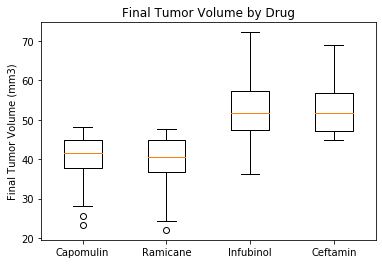

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_list)

# Add labels and title to plot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

# Display plot
plt.show()

## Line and Scatter Plots

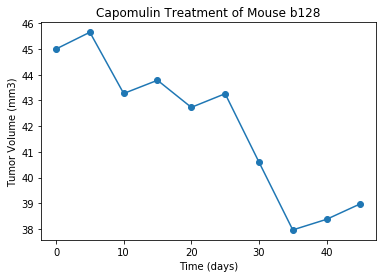

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_b128 = clean_pyma_df.loc[clean_pyma_df['Mouse ID'] == 'b128']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(mouse_b128['Timepoint'], mouse_b128['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse b128")

# Display plot
plt.show()



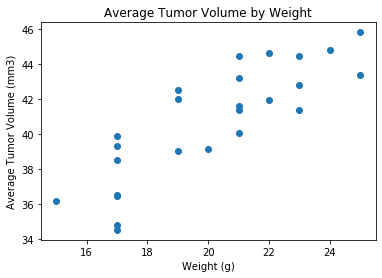

In [33]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_df = clean_pyma_df.loc[clean_pyma_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avgerage_tumor_vol = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})

# Merge average tumor volume onto data_df and drop duplicates
average_vol_df = pd.merge(capomulin_df, avgerage_tumor_vol, on='Mouse ID')
final_avg_vol_df = average_vol_df[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['Average Tumor Volume']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()


## Correlation and Regression

 The correlation coefficient (r) between weight (g) and Average Tumor Volume (mm3): 0.84.


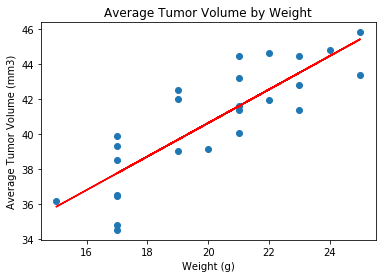

In [39]:



# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x,y)
print(f" The correlation coefficient (r) between weight (g) and Average Tumor Volume (mm3): {round(correlation[0],2)}.")

# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(m, b, r, p, std_err) = st.linregress(x, y)
slope_intercerpt = (m * x) + b

# Create a scatter plot
plt.scatter(x,y)
plt.plot(x,slope_intercerpt, "r")


# Add labels and title to plot.  Display plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()